# PyTorch - Vortrag
### HTW Berlin - Angewandte Informatik (B. Sc.)
#### Modul "Ausgewählte Kapitel sozialer Webtechnologien" (aka Neuronale Netze)

##### Diletta Calussi - s0559842

# Inhalte

1. Das Framework PyTorch
2. PyTorch Fundamentals (Warm-up)
3. Neuronale Netze in PyTorch
4. Quellen

## 1. Das Framework [PyTorch](https://pytorch.org/)

- Eine ML Open-Source-Bibliothek für python
- Basiert auf der in [**Lua**](https://www.lua.org/) geschriebenen Bibliothek [**Torch**](http://torch.ch/)
- Vom Facebook-Forschungsteam für K.I. entwickelt 
- Erscheinungsjahr: 2016
- Unterstützt GPU sowie CPU 
- High Level


### Kurze Übersicht

1. Tensoren
2. Dynamische Graphen (Dynamic Computational Graph)
3. Autograd-System zur Berechnung der Ableitungen 


### Packages für diese Präsentation
- torch (CUDA oder GPU)
- torchvision
- numpy



Eine Anleitung für die Installation ist auf der Webseite von [PyTorch](https://pytorch.org/) verfügbar.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Installation check
import torch
print("Torch version:", torch.__version__)
print("CUDA is active:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)

Torch version: 0.4.1
CUDA is active: True
CUDA version: 8.0


## 2. PyTorch Fundamentals (Warm-up)

PyTorch bietet zwei Abstraktionen für Datenstrukturen: Tensoren und Variablen. Tensoren sind so ähnlich wie NumPy-Arrays und können auch auf GPUs übertragen werden. Variablen waren bis zur Version 0.4. als Wrapper um Tensoren notwendig, um bsp. die Berechnung der Gradienten zu ermöglichen.

### 2.1 Tensoren

Ein `torch.Tensor` ist eine mehrdimensionale Matrix, die Elemente von einem bestimmten Datentyp enthält. Ein detaillierter Überblick der unterstützten Datentype ist auf der [Webseite von PyTorch](https://pytorch.org/docs/stable/tensors.html) verfügbar.  

PyTorch unterstützt sowohl GPU- als auch CPU-Tensoren.

#### Beispiele aus der [PyTorch-Webseite](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py)

In [3]:
from __future__ import print_function
import torch

#5x3 matrix, nicht initialisiert
x = torch.empty(5, 3)
print(x)

#Random-Initialisierung
x = torch.rand(5, 3)
print(x)

#Matrix filled with zeros mit Typ Long
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

#Tensor aus Daten
x = torch.tensor([5.5, 3])
print(x)

x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

print(x.size())

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000, -0.0000,  0.0000]])
tensor([[0.1622, 0.0688, 0.7916],
        [0.5695, 0.0396, 0.9926],
        [0.1748, 0.2957, 0.8233],
        [0.7330, 0.2710, 0.6552],
        [0.7196, 0.0887, 0.1258]])
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])
tensor([5.5000, 3.0000])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.2490,  0.8078, -0.6586],
        [-0.2367,  0.7260, -0.5984],
        [-1.2892, -0.5238,  0.6326],
        [-1.7466, -0.1070, -1.8256],
        [ 0.5493, -0.5402, -0.7741]])
torch.Size([5, 3])


#### Operationen auf Tensoren

In [4]:
a = torch.randint(1,10,(2,3))
b = torch.randint(1,10,(2,3))
print(a)
print()
print(b)

tensor([[3., 8., 4.],
        [7., 1., 3.]])

tensor([[5., 6., 3.],
        [6., 7., 5.]])


In [5]:
#Elementwise Operationen (mit den Funktionen .add(), .sub(), .mul(), .div())
print("Elementwise-Operationen:")
print("Addition: \n", torch.add(a,b), "\noder:", a+b)
print("*"*60)
print("Subtraktion:\n", torch.sub(a,b), "\noder:", a-b)
print("*"*60)
print("Multiplikation:\n", torch.mul(a,b), "\noder:", a*b)
print("*"*60)
print("Division:\n", torch.div(a,b), "\noder:", a/b)
print("*"*60)
print("IN-PLACE: ")
print(a.add_(b)) #adds b to a
print(a)

Elementwise-Operationen:
Addition: 
 tensor([[ 8., 14.,  7.],
        [13.,  8.,  8.]]) 
oder: tensor([[ 8., 14.,  7.],
        [13.,  8.,  8.]])
************************************************************
Subtraktion:
 tensor([[-2.,  2.,  1.],
        [ 1., -6., -2.]]) 
oder: tensor([[-2.,  2.,  1.],
        [ 1., -6., -2.]])
************************************************************
Multiplikation:
 tensor([[15., 48., 12.],
        [42.,  7., 15.]]) 
oder: tensor([[15., 48., 12.],
        [42.,  7., 15.]])
************************************************************
Division:
 tensor([[0.6000, 1.3333, 1.3333],
        [1.1667, 0.1429, 0.6000]]) 
oder: tensor([[0.6000, 1.3333, 1.3333],
        [1.1667, 0.1429, 0.6000]])
************************************************************
IN-PLACE: 
tensor([[ 8., 14.,  7.],
        [13.,  8.,  8.]])
tensor([[ 8., 14.,  7.],
        [13.,  8.,  8.]])


Resizing geht am besten mit [`view()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view):


In [6]:
#Reshaping mit view
print(a.size(), b.size())
try:
    torch.mm(a,b)
except RuntimeError as e:
    print(e)
#Resizing    
b_view = b.view(3,2)
torch.mm(a,b_view)

torch.Size([2, 3]) torch.Size([2, 3])
size mismatch, m1: [2 x 3], m2: [2 x 3] at c:\programdata\miniconda3\conda-bld\pytorch_1533090265711\work\aten\src\th\generic/THTensorMath.cpp:2070


tensor([[131., 167.],
        [145., 166.]])

### 2.2 NumPy Bridge
- Umwandlung eines PyTorch-Tensors zu einem numpy-Array:
    * Die Tensoren teilen den selben Speicherplatz. Änderungen beeinflussen beide Tensoren!

In [7]:
import numpy as np
import torch

In [8]:
a = torch.ones(5)
print(a, type(a))

#Conversion zu einem numpy-Array
b = a.numpy()
print(b, type(b))

#Sharing same memory locations --> Changes apply to each vector
a.add_(1)
print("a:", a)
print("b:", b)

tensor([1., 1., 1., 1., 1.]) <class 'torch.Tensor'>
[1. 1. 1. 1. 1.] <class 'numpy.ndarray'>
a: tensor([2., 2., 2., 2., 2.])
b: [2. 2. 2. 2. 2.]


### 2.3 CUDA Tensors
Tensoren können unter den Geräten mit der Methode `to()` geschoben werden:

In [9]:
# CUDA Tensors
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([[ 1.2490,  1.8078,  0.3414],
        [ 0.7633,  1.7260,  0.4016],
        [-0.2892,  0.4762,  1.6326],
        [-0.7466,  0.8930, -0.8256],
        [ 1.5493,  0.4598,  0.2259]], device='cuda:0')
tensor([[ 1.2490,  1.8078,  0.3414],
        [ 0.7633,  1.7260,  0.4016],
        [-0.2892,  0.4762,  1.6326],
        [-0.7466,  0.8930, -0.8256],
        [ 1.5493,  0.4598,  0.2259]], dtype=torch.float64)


### 2.4 [Autograd](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html): Automatische Differentierung un PyTorch

Das Package `torch.autograd` bietet eine automatische Differenzierung für alle Operationen an Tensoren. 

Notwendig sind folgende Objekte:
- `torch.Tensor`-Objekte mit dem Attribut `requires_grad` auf `True` gesetzt. Am Ende einer Computation reicht es aus, die Methode `backward()` aufzurufen, damit alle Gradienten automatisch berechnet werden. Der Gradient von einem Tensor kann mit dem Attribut `grad` angesehen werden
- `Funktion`-Objekte die mit Tensoren in einem Graphen verbunden sind. Jeder Tensor hat das Attribut `.grad_fn`, das eine Referenz auf die Funktion enthält, die den Tensor generiert hat).

Beispiel aus der Übung:

<img src="graph.png" >

* a = 2
* b = e
* c = 3

In [10]:
# External Modules
import torch

In [11]:
#Tensor deklariation
a = torch.tensor(2., requires_grad=True)
b = torch.tensor(np.e, requires_grad=True)
c = torch.tensor(3., requires_grad=True)

print(a, b, c)
#Wenn ein Tensor nur ein Element enthält, kann das Element mit .item() ausgegeben werden
print("Variable a: ", a.item())

tensor(2., requires_grad=True) tensor(2.7183, requires_grad=True) tensor(3., requires_grad=True)
Variable a:  2.0


In [12]:
print(a.grad, b.grad, c.grad)
print(a.requires_grad, b.requires_grad, c.requires_grad)

None None None
True True True


In [13]:
def applyExerciseFunction(a,b,c):
    ln = torch.log(b)
    print(ln.grad_fn)
    x = a + ln 
    print(x.grad_fn)
    x = c * x
    print(x.grad_fn)
    x = (1./3.)*x
    print(x.grad_fn)
    out = 1./x
    print(out.grad_fn)
    return out

In [14]:
out =  applyExerciseFunction(a,b,c) #1/3
print("Ergebnis aus Fowardpass: ", out.item()) #1./3.

Ergebnis aus Fowardpass:  0.3333333432674408


In [15]:
out.backward()

In [16]:
print("dout/da: ", a.grad)
print("dout/db: ", b.grad)
print("dout/dc: ", c.grad)

dout/da:  tensor(-0.1111)
dout/db:  tensor(-0.0409)
dout/dc:  tensor(-0.1111)


In [17]:
#Ausschalten der Gradienten:
print(a.requires_grad)
print((a ** 2).requires_grad)

with torch.no_grad():
    print((a ** 2).requires_grad)

True
True
False


## 3. Neuronale Netze in PyTorch: `torch.nn` und `torchvision`

### Das Package [`torch.nn`](https://pytorch.org/docs/stable/nn.html#)

Neuronale Netze können in PyTorch einfach mit dem Objekten und Funktionen aus dem Modul `torch.nn` erzeugt werden.

Das Package bietet Klassen für 
* die allgemeine Definition eines Modells (sog. [Container](https://pytorch.org/docs/stable/nn.html#containers)), wie `nn.Module`, sowie dessen 
* Layers, 
* Aktivierungsfunktionen, 
* Kostenfuntkionen ([Loss functions](https://pytorch.org/docs/stable/nn.html#loss-functions))

Optimizer sind im Package [`torch.optim`](https://pytorch.org/docs/stable/optim.html#module-torch.optim) zu finden.
Funktionen sind auch im Package `torch.nn.functional` verfügbar.
Ein `nn.Module` enthält die Methode `forward(input)`, die das Ergebnis berechnet.


### Das Package `torchvision`

Viele Datensätze sind mit dem Package [`torchvision.datasets`](https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision-datasets) verfügbar.

## 3.1 FeedForward-Network

### 3.1.1 MNIST-Datensatz vorbereiten

Folgendes Beispiel implementiert ein FeedForward-Network für die Klassifizierung der Bilder aus dem MNIST-Datensatz.

In [136]:
import torchvision.transforms as transforms
import torchvision.datasets as dataset

In [137]:
train_dataset = dataset.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dataset.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

#### Datensatz iterierbar machen
Da wir 60000 Trainingsproben (Bilder) haben, müssen wir sie in kleine Gruppen (Batches) aufteilen und diese Batches an unser Feedforward Neural Network übergeben. 
Bei einer Batchgröße von 100, werden dem Modell bei jeder Iteration 600 Bilder übergeben.

Eine Epoche bedeutet, dass das gesamte Trainingsset mit 60.000 Bildern erfolgreich an das Modell übergeben wurde: Eine Epoche besteht aus 600 Iterationen. 

Wenn wir den gesamten Datensatz 5 mal (5 Epochen) durchgehen wollen, damit das Modell lernt, dann sind 3000 Iterationen (600 x 5) notwendig. 


In [138]:
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

### 3.1.2 Netzklasse mit `nn.Module` definieren

PyTorch bietet viele Möglichkeiten, um ein Netz zu definieren. Hier leitet die Netzklasse aus dem Modul `nn.Module` ab. Sie definiert im Konsktruktor die notwendigen Layer sowie die Aktivierungsfunktion (== die Struktur) und in der Methode `forward()` die Schritte zum Ergebnis.

Netzstruktur:
- 3 fully connected Layers: Input-Layer, Hidden Layer, Output Layer
- ReLU als Aktivierungsfunktion

Eine Liste von weiteren Aktivierungsfunktionen ist [hier](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity) verfügbar.

Weitere Beispiele zur Definiton von einer Netzklasse:
- PyTorch-Doku: https://pytorch.org/docs/stable/nn.html#
- Udacity "Neural Networks with PyTorch" (Jupyter Notebook):  
https://github.com/udacity/deep-learning-v2-pytorch/blob/master/intro-to-pytorch/Part%202%20-%20Neural%20Networks%20in%20PyTorch%20(Solution).ipynb

Die Implementierung von diesem Netz erfolgte in Anlehnung zu folgenden Quellen:
- Udacity Tutorial
- Deep Learning Wizard: https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_feedforward_neuralnetwork/
- Github-Repo: https://github.com/fawazsammani/The-Complete-Neural-Networks-Bootcamp-Theory-Applications/blob/master/Feed%20Forward%20Neural%20Network%20MNIST.ipynb

In [163]:
#######################
#  USE GPU FOR MODEL  #
#######################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Model A: 1 Hidden Layer Feedforward Neural Network (Sigmoid Activation)

In [164]:
import torch

In [165]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) 

        # Non-linearity
        self.sigmoid = nn.Sigmoid()

        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)  

    def forward(self, x):
        # Linear function  # LINEAR
        out = self.fc1(x)

        # Non-linearity  # NON-LINEAR
        out = self.sigmoid(out)

        # Linear function (readout)  # LINEAR
        out = self.fc2(out)
        return out

### Modellklasse instanzieren

- Input dimension: 784
    * Size of image
        * 28×28=784
- Output dimension: 10 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)    

- Hidden dimension: 100

In [166]:
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
model.to(device)

FeedforwardNeuralNetModel(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (sigmoid): Sigmoid()
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

### Loss
- Feedforward Neural Network: **Cross Entropy Loss**
    - Berechnung des Fehlers zwishen den softmax output und den Labels

In [167]:
criterion = nn.CrossEntropyLoss()

### Optimizer
- Stochastich Gradient Descent

In [168]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

### Parameter von einem Netz untersuchen

In [169]:
print(len(list(model.parameters())))

# FC 1 Parameters 
print(list(model.parameters())[0].size())

# FC 1 Bias Parameters
print(list(model.parameters())[1].size())

# FC 2 Parameters
print(list(model.parameters())[2].size())

# FC 2 Bias Parameters
print(list(model.parameters())[3].size())

4
torch.Size([100, 784])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


### Übersicht

<img src="nn1_params3.png" >

Quelle: https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_feedforward_neuralnetwork/

1. Yellow box: Lineare Transformation auf dem Input $\boldsymbol{y} = W\boldsymbol{x} + \boldsymbol{b}$
2. Pink box: Logits werden einer nichtlinearen Funktion übergeben 
3. Blue box: Lineare Transformation auf dem Output
4. Red box: Wahrscheinlichkeiten
5. Purple box: Loss berechnen mit Cross Entropy Funktion

Achtung: 
- Die `CrossEntropyLoss`-Funktion in PyTorch berechnet automatisch die Softmax-Werte. Deswegen muss man beim letzten Schritt im Forward-Pass kein Softmax berechnen

### Modell trainieren

1. Input zu Tensoren umwandeln mit requires_grad 
2. Gradient-Buffer zurücksetzen: `zero_grad()`
3. Berechnung des Outputs 
4. Berechnung des Fehlers durch Anwendung des `criterion` auf die berechneten Ergebnisse und bestehenden Labels
5. Berechnung der Gradienten bezüglich der Parameter: `backward()`
6. Parameter über den Optimizer aktualisieren: `step()`

In [171]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_().to(device)
        labels = labels.to(device)
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step() #parameters = parameters - learning_rate * parameters_gradients

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28).requires_grad_().to(device)
    
                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                #######################
                #  USE GPU FOR MODEL  #
                #######################
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.type(torch.FloatTensor).cpu() == labels.type(torch.FloatTensor)).sum()
                else:
                    correct += (predicted == labels).sum()


            accuracy = 100. * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.2f}%'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.606570839881897. Accuracy: 86.46%
Iteration: 1000. Loss: 0.4626705050468445. Accuracy: 89.48%
Iteration: 1500. Loss: 0.3501792252063751. Accuracy: 90.28%
Iteration: 2000. Loss: 0.3461214005947113. Accuracy: 91.24%
Iteration: 2500. Loss: 0.18066388368606567. Accuracy: 91.64%
Iteration: 3000. Loss: 0.2540605068206787. Accuracy: 91.99%


## Modell B: 1 Hidden Layer Feedforward Neural Network (ReLU Activation)

In [174]:
'''
STEP 3: CREATE MODEL CLASS
'''
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity
        self.relu = nn.ReLU()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)  

    def forward(self, x):
        # Linear function
        out = self.fc1(x)
        # Non-linearity
        out = self.relu(out)
        # Linear function (readout)
        out = self.fc2(out)
        return out
'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
model.to(device)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_().to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28).requires_grad_().to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                print(labels.size(0))
                print(total)
                total += labels.size(0)
                
                ######################
                #  USE GPU FOR MODEL  #
                #######################
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.type(torch.FloatTensor).cpu() == labels.type(torch.FloatTensor)).sum()
                else:
                    correct += (predicted == labels).sum()


            accuracy = 100. * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.2f}%'.format(iter, loss.item(), accuracy))

100
0
100
100
100
200
100
300
100
400
100
500
100
600
100
700
100
800
100
900
100
1000
100
1100
100
1200
100
1300
100
1400
100
1500
100
1600
100
1700
100
1800
100
1900
100
2000
100
2100
100
2200
100
2300
100
2400
100
2500
100
2600
100
2700
100
2800
100
2900
100
3000
100
3100
100
3200
100
3300
100
3400
100
3500
100
3600
100
3700
100
3800
100
3900
100
4000
100
4100
100
4200
100
4300
100
4400
100
4500
100
4600
100
4700
100
4800
100
4900
100
5000
100
5100
100
5200
100
5300
100
5400
100
5500
100
5600
100
5700
100
5800
100
5900
100
6000
100
6100
100
6200
100
6300
100
6400
100
6500
100
6600
100
6700
100
6800
100
6900
100
7000
100
7100
100
7200
100
7300
100
7400
100
7500
100
7600
100
7700
100
7800
100
7900
100
8000
100
8100
100
8200
100
8300
100
8400
100
8500
100
8600
100
8700
100
8800
100
8900
100
9000
100
9100
100
9200
100
9300
100
9400
100
9500
100
9600
100
9700
100
9800
100
9900
Iteration: 500. Loss: 0.21741831302642822. Accuracy: 91.68%
100
0
100
100
100
200
100
300
100
400
100
500
100
60

## Model C: 2 Hidden Layer Feedforward Neural Network (ReLU Activation)

<img src="nn2.png" >

In [175]:
import torch
import torch.nn as nn

'''
STEP 3: CREATE MODEL CLASS
'''
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function 1: 784 --> 100
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()

        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.ReLU()

        # Linear function 3 (readout): 100 --> 10
        self.fc3 = nn.Linear(hidden_dim, output_dim)  

    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)

        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)

        # Linear function 3 (readout)
        out = self.fc3(out)
        return out
'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
model.to(device)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_().to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28).requires_grad_().to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                #######################
                #  USE GPU FOR MODEL  #
                #######################
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.type(torch.FloatTensor).cpu() == labels.type(torch.FloatTensor)).sum()
                else:
                    correct += (predicted == labels).sum()


            accuracy = 100. * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.2f}%'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.24176952242851257. Accuracy: 90.98%
Iteration: 1000. Loss: 0.1572435051202774. Accuracy: 93.58%
Iteration: 1500. Loss: 0.17064525187015533. Accuracy: 94.84%
Iteration: 2000. Loss: 0.1974581927061081. Accuracy: 95.60%
Iteration: 2500. Loss: 0.1180160716176033. Accuracy: 96.00%
Iteration: 3000. Loss: 0.11274317651987076. Accuracy: 96.39%


In [23]:
input_size = 784        #Number of input neurons (image pixels)
hidden_size = 400       #Number of hidden neurons
out_size = 10           #Number of classes (0-9) 
epochs = 15             #How many times we pass our entire dataset into our network 
batch_size = 100        #Input size of the data during one iteration 
learning_rate = 0.01   #How fast we are learning

In [24]:
from torch import nn

In [116]:
class FFNet(nn.Module):
    """def __init__(self, input_size, hidden_size, out_size):
        super(FFNet, self).__init__()                    
        self.fc1 = nn.Linear(input_size, hidden_size)    #First Layer
        self.relu = nn.ReLU()                            #First Layer Activation 
        self.fc2 = nn.Linear(hidden_size, hidden_size)   #Second Layer
        self.fc3 = nn.Linear(hidden_size, out_size)      #Second Layer Activation 
    
    def forward(self, x):                                #Forward Propagate 
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out"""
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256) #Input Layer
        self.fc2 = nn.Linear(256, 128) #1st hidden Layer
        self.fc3 = nn.Linear(128, 64) #2nd hidden Layer
        self.fc4 = nn.Linear(64, 10) #Output layer
        #Aktivierungsfunktion
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        #x = F.log_softmax(self.fc4(x), dim=1)
        
        return x
    

#### Netz initialisieren, Loss-Kriterium und Optimiser festlgegen:

- Loss-Kriterium:
    - [`CrossEntropyLoss()`](https://pytorch.org/docs/stable/nn.html#torch.nn.CrossEntropyLoss): In PyTorch berechnet das Modul CrossEntropyLoss Softmax für die Eingabe. Deswegen braucht man im Forwardpass beim letzten Schritt kein softmax zu berechnen.
- Optimizer: Stochastic Gradient Descent

In [117]:
"""#Objekt initialisieren
net = FFNet(input_size, hidden_size, out_size)

CUDA = torch.cuda.is_available()
if CUDA:
    net = net.cuda()
    
criterion = nn.CrossEntropyLoss()

#Optimizer ist stochastic gradient descent
#Parameter: Network-parameters, learning rate
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) """

net = FFNet()

CUDA = torch.cuda.is_available()
if CUDA:
    net = net.cuda()
    
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

In [118]:
#Netz-Beschreibung
print(net)
#oder
print(net.parameters)

FFNet(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)
<bound method Module.parameters of FFNet(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)>


In [122]:
images, labels = next(iter(test_loader))
if CUDA:
    images = images.cuda()
    labels = labels.cuda()

output = net(images)
#print(output[:10])
# Get the class probabilities
#ps = torch.exp(model(images))
print(output[:1])
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(output.shape)

tensor([[-0.0993, -0.1937, -0.0627, -0.1156, -0.0860, -0.0180,  0.0204, -0.1012,
          0.0941,  0.0929]], device='cuda:0', grad_fn=<SliceBackward>)
torch.Size([64, 10])


In [132]:
top_p, top_class = output.topk(1, dim=1)
print(top_p)
# Look at the most likely classes for the first 10 examples
print(top_class[:10,:])

tensor([[0.0941],
        [0.1262],
        [0.0882],
        [0.0996],
        [0.0747],
        [0.0958],
        [0.0831],
        [0.1025],
        [0.0965],
        [0.1019],
        [0.0694],
        [0.0801],
        [0.1145],
        [0.1008],
        [0.0815],
        [0.0834],
        [0.0861],
        [0.1161],
        [0.1159],
        [0.1036],
        [0.1045],
        [0.1066],
        [0.0764],
        [0.0728],
        [0.0802],
        [0.0713],
        [0.1047],
        [0.0923],
        [0.0990],
        [0.0837],
        [0.0909],
        [0.0873],
        [0.0926],
        [0.0985],
        [0.1110],
        [0.0678],
        [0.1130],
        [0.0832],
        [0.0765],
        [0.0846],
        [0.0691],
        [0.1027],
        [0.0813],
        [0.0950],
        [0.1053],
        [0.0895],
        [0.0916],
        [0.1055],
        [0.0949],
        [0.0995],
        [0.0898],
        [0.1190],
        [0.0955],
        [0.0885],
        [0.0956],
        [0

In [125]:
equals = top_class == labels.view(*top_class.shape)

In [126]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 1.5625%


In [130]:
keineAhnung, predicted = torch.max(outputs.data, 1) 

In [133]:
predicted

tensor([1, 2, 3, 0, 5, 0, 7, 8, 9, 0, 1, 2, 3, 0, 5, 0], device='cuda:0')

#### FFNet trainieren

In [115]:
epochs = 10
steps = 0
correct_train = 0
total_train = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        if CUDA:
            images = images.cuda()
            labels = labels.cuda()
            
        optimizer.zero_grad()
        
        outputs = net(images)                             # Forward pass
        _, predicted = torch.max(outputs.data, 1)  
       
        total_train += labels.size(0) 
        if CUDA:
            correct_train += (predicted.cpu() == labels.cpu()).sum() 
        else:
            correct_train += (predicted == labels).sum() 
            
        loss = criterion(outputs, labels)                 # Difference between the actual and predicted (loss function)
        loss.backward()                                   # Backpropagation
        optimizer.step()            
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        ###
        correct = 0
        total = 0
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in test_loader:
                if CUDA:
                    images = images.cuda()
                    labels = labels.cuda()
                outputs = net(images) 
                _, predicted = torch.max(outputs.data, 1) 
                total += labels.size(0) # Increment the total count (100)
                
                if CUDA:
                    correct += (predicted.cpu() == labels.cpu()).sum()    
                else:
                    correct += (predicted == labels).sum() 
                    
                test_loss += criterion(outputs, labels)
           
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {}%".format(100*correct/total))

Epoch: 1/10..  Training Loss: 0.492..  Test Loss: 0.522..  Test Accuracy: 78.000
Epoch: 2/10..  Training Loss: 0.490..  Test Loss: 0.524..  Test Accuracy: 78.000
Epoch: 3/10..  Training Loss: 0.489..  Test Loss: 0.519..  Test Accuracy: 78.000
Epoch: 4/10..  Training Loss: 0.487..  Test Loss: 0.521..  Test Accuracy: 78.000
Epoch: 5/10..  Training Loss: 0.485..  Test Loss: 0.519..  Test Accuracy: 78.000
Epoch: 6/10..  Training Loss: 0.484..  Test Loss: 0.528..  Test Accuracy: 78.000
Epoch: 7/10..  Training Loss: 0.483..  Test Loss: 0.522..  Test Accuracy: 78.000
Epoch: 8/10..  Training Loss: 0.481..  Test Loss: 0.518..  Test Accuracy: 79.000
Epoch: 9/10..  Training Loss: 0.480..  Test Loss: 0.522..  Test Accuracy: 78.000
Epoch: 10/10..  Training Loss: 0.479..  Test Loss: 0.525..  Test Accuracy: 78.000


In [90]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

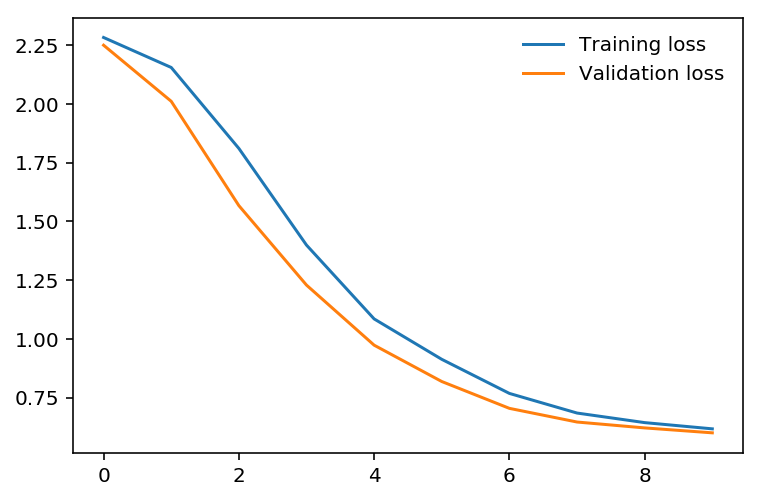

In [91]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [28]:
#Netz trainieren
#Train the network
correct_train = 0
total_train = 0
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):   
        #Flatten the image from size (batch,1,28,28) --> (100,1,28,28) where 1 represents the number of channels (grayscale-->1),
        # to size (100,784) and wrap it in a variable
        images = images.view(-1, 28*28)   
        if CUDA:
            images = images.cuda()
            labels = labels.cuda()
        # Clear the param_grad in param = param - lr*param_grad, so it won't be accumulated
        optimizer.zero_grad()                             
        outputs = net(images)                             # Forward pass
        _, predicted = torch.max(outputs.data, 1)         # Return the second argument of torch.max which represents 
                                                          # the index location of each maximum value found  
        total_train += labels.size(0) 
        if CUDA:
            correct_train += (predicted.cpu() == labels.cpu()).sum() 
        else:
            correct_train += (predicted == labels).sum() 
          
        loss = criterion(outputs, labels)                 # Difference between the actual and predicted (loss function)
        loss.backward()                                   # Backpropagation
        optimizer.step()                                  # Update the weights
        
        if (i+1) % 100 == 0:                              # Printing the results 
            print('Epoch [{}/{}], Iteration [{}/{}], Training Loss: {}, Training Accuracy: {}%'.format
                 (epoch+1, epochs, i+1, len(train_dataset)//batch_size, loss.data[0], (100*correct_train/total_train)))
print("DONE TRAINING!")

Epoch [1/15], Iteration [100/600], Training Loss: 1.8407481908798218, Training Accuracy: 51%
Epoch [1/15], Iteration [200/600], Training Loss: 0.8517826199531555, Training Accuracy: 63%
Epoch [1/15], Iteration [300/600], Training Loss: 0.6758299469947815, Training Accuracy: 70%
Epoch [1/15], Iteration [400/600], Training Loss: 0.4399491250514984, Training Accuracy: 74%
Epoch [1/15], Iteration [500/600], Training Loss: 0.4819956123828888, Training Accuracy: 76%
Epoch [1/15], Iteration [600/600], Training Loss: 0.2581551671028137, Training Accuracy: 78%
Epoch [2/15], Iteration [100/600], Training Loss: 0.34013375639915466, Training Accuracy: 80%
Epoch [2/15], Iteration [200/600], Training Loss: 0.43181464076042175, Training Accuracy: 81%
Epoch [2/15], Iteration [300/600], Training Loss: 0.22752182185649872, Training Accuracy: 82%
Epoch [2/15], Iteration [400/600], Training Loss: 0.3089792728424072, Training Accuracy: 83%
Epoch [2/15], Iteration [500/600], Training Loss: 0.273601114749908

Epoch [15/15], Iteration [500/600], Training Loss: 0.14589154720306396, Training Accuracy: 93%
Epoch [15/15], Iteration [600/600], Training Loss: 0.09284001588821411, Training Accuracy: 93%
DONE TRAINING!


#### FFNet testen

In [29]:
#Test the network (No loss and weight calculation, no weight update)
correct = 0
total = 0
for images, labels in test_loader:
    images = images.view(-1, 28*28)
    if CUDA:
        images = images.cuda()
    #For each input (sample/row) in the batch, the output will contain 10 elements
    outputs = net(images)
    #We could also write: predicted = outputs.data.max(1)[1]
    _, predicted = torch.max(outputs.data, 1)  
    total += labels.size(0) # Increment the total count (100)
    #We can also use: correct += predicted.eq(labels).sum()
    if CUDA:
        correct += (predicted.cpu() == labels.cpu()).sum()    
    else:
        correct += (predicted == labels).sum()    
    
    
print('Final Test Accuracy: %d %%' % (100 * correct / total))

Final Test Accuracy: 96 %


## 3.2 Convolutional Neural Network  (MNIST)

In [30]:
import torch
import torch.nn as nn

In [31]:
#Create the model class
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        #Same Padding = [(filter size - 1) / 2] (Same Padding--> input size = output size)
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3,stride=1, padding=1)
        #The output size of each of the 8 feature maps is 
        #[(input_size - filter_size + 2(padding) / stride) +1] --> [(28-3+2(1)/1)+1] = 28 (padding type is same)
        #Batch normalization
        self.batchnorm1 = nn.BatchNorm2d(8)
        #RELU
        self.relu = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        #After max pooling, the output of each feature map is now 28/2 = 14
        self.cnn2 = nn.Conv2d(in_channels=8, out_channels=32, kernel_size=5, stride=1, padding=2)
        #Output size of each of the 32 feature maps remains 14
        self.batchnorm2 = nn.BatchNorm2d(32)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        #After max pooling, the output of each feature map is 14/2 = 7
        #Flatten the feature maps. You have 32 feature maps, each of them is of size 7x7 --> 32*7*7 = 1568
        self.fc1 = nn.Linear(in_features=1568, out_features=600)
        self.droput = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(in_features=600, out_features=10)
    def forward(self,x):
        out = self.cnn1(x)
        out = self.batchnorm1(out)
        out = self.relu(out)
        out = self.maxpool1(out)
        out = self.cnn2(out)
        out = self.batchnorm2(out)
        out = self.relu(out)
        out = self.maxpool2(out)
        #Now we have to flatten the output. This is where we apply the feed forward neural network as learned before! 
        #It will take the shape (batch_size, 1568) = (100, 1568)
        out = out.view(-1,1568)
        #Then we forward through our fully connected layer 
        out = self.fc1(out)
        out = self.relu(out)
        out = self.droput(out)
        out = self.fc2(out)
        return out

In [42]:
model = CNN()
CUDA = torch.cuda.is_available()
if CUDA:
    model = model.cuda()    
loss_fn = nn.CrossEntropyLoss()        
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [34]:
#Training the CNN
num_epochs = 10

#Define the lists to store the results of loss and accuracy
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

#Training
for epoch in range(num_epochs): 
    #Reset these below variables to 0 at the begining of every epoch
    correct = 0
    iterations = 0
    iter_loss = 0.0
    
    model.train()                   # Put the network into training mode
    
    for i, (inputs, labels) in enumerate(train_loader):
        
        # If we have GPU, shift the data to GPU
        CUDA = torch.cuda.is_available()
        if CUDA:
            inputs = inputs.cuda()
            labels = labels.cuda()
        
        optimizer.zero_grad()            # Clear off the gradient in (w = w - gradient)
        outputs = model(inputs)         
        loss = loss_fn(outputs, labels)  
        iter_loss += loss.data[0]       # Accumulate the loss
        loss.backward()                 # Backpropagation 
        optimizer.step()                # Update the weights
        
        # Record the correct predictions for training data 
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum()
        iterations += 1
    
    # Record the training loss
    train_loss.append(iter_loss/iterations)
    # Record the training accuracy
    train_accuracy.append((100 * correct / len(train_dataset)))
   
    #Testing
    loss = 0.0
    correct = 0
    iterations = 0

    model.eval()                    # Put the network into evaluation mode
    
    for i, (inputs, labels) in enumerate(test_loader):
        if CUDA:
            inputs = inputs.cuda()
            labels = labels.cuda()
        
        outputs = model(inputs)     
        loss = loss_fn(outputs, labels) # Calculate the loss
        loss += loss.data[0]
        # Record the correct predictions for training data
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum()
        
        iterations += 1

    # Record the Testing loss
    test_loss.append(loss/iterations)
    # Record the Testing accuracy
    test_accuracy.append((100 * correct / len(test_dataset)))
    
    print ('Epoch {}/{}, Training Loss: {:.3f}, Training Accuracy: {:.2f}%, Testing Loss: {:.3f}, Testing Accuracy: {:.2f}%'
           .format(epoch+1, num_epochs, train_loss[-1], train_accuracy[-1], 
             test_loss[-1], test_accuracy[-1]))

Epoch 1/10, Training Loss: 0.713, Training Accuracy: 81.00%, Testing Loss: 0.006, Testing Accuracy: 94.00%
Epoch 2/10, Training Loss: 0.197, Training Accuracy: 94.00%, Testing Loss: 0.003, Testing Accuracy: 96.00%
Epoch 3/10, Training Loss: 0.139, Training Accuracy: 95.00%, Testing Loss: 0.003, Testing Accuracy: 97.00%
Epoch 4/10, Training Loss: 0.111, Training Accuracy: 96.00%, Testing Loss: 0.002, Testing Accuracy: 97.00%
Epoch 5/10, Training Loss: 0.096, Training Accuracy: 97.00%, Testing Loss: 0.002, Testing Accuracy: 98.00%
Epoch 6/10, Training Loss: 0.084, Training Accuracy: 97.00%, Testing Loss: 0.002, Testing Accuracy: 98.00%
Epoch 7/10, Training Loss: 0.075, Training Accuracy: 97.00%, Testing Loss: 0.001, Testing Accuracy: 98.00%
Epoch 8/10, Training Loss: 0.070, Training Accuracy: 97.00%, Testing Loss: 0.001, Testing Accuracy: 98.00%
Epoch 9/10, Training Loss: 0.063, Training Accuracy: 98.00%, Testing Loss: 0.001, Testing Accuracy: 98.00%
Epoch 10/10, Training Loss: 0.059, Tr

In [41]:
from random import randint
rand_idx = randint(0,10001)
print(rand_idx)
img = test_dataset[rand_idx][0].resize_((1, 1, 28, 28))   #(batch_size,channels,height,width)
label = test_dataset[rand_idx][1]

model.eval()

if CUDA:
    model = model.cuda()
    img = img.cuda()
    
output = model(img)
print(output)
print(output.data)
_, predicted = torch.max(output,1)
print("Prediction is: ", predicted.item())
print("Actual is is : ", label.item())

8997
tensor([[ 1.2415, -3.2654, -0.0837, -3.0032,  2.2969,  1.8857, 13.7696, -9.4470,
          1.4453, -3.6773]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([[ 1.2415, -3.2654, -0.0837, -3.0032,  2.2969,  1.8857, 13.7696, -9.4470,
          1.4453, -3.6773]], device='cuda:0')
Prediction is:  6
Actual is is :  6


In [37]:
#Packt publishing
def plot_img(image):
    image = image.numpy()[0]
    mean = 0.1307
    std = 0.3081
    image = ((mean * image) + std)
    plt.imshow(image,cmap='binary', interpolation='bicubic')

## Quellen

https://github.com/udacity/deep-learning-v2-pytorch